<a href="https://colab.research.google.com/github/KevOdhiambo/KNN-Naive-Bayes-Classification/blob/main/Titanic_Dataset_Surival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Titanic Passenger's Survival Model Prediction

**Specifying Analysis Question**

Build a model that predicts the survival of passengers using the titanic (train) dataset.


**Defining the Metric for Success**

come up with a higher accurate model for predicting survival rates of passengers.

**Understanding the context**

The Titanic lies at a depth of about 12,500 feet, about 370 nautical miles south-southeast of the coast of Newfoundland. It lies in two main pieces about 2,000 feet apart. The bow is still recognisable with many preserved interiors, despite deterioration and damage sustained hitting the sea floor. As such using a dataset with infomation on passengers aboard the titanic on the material day of sining, i'm to uild prediction models for passengers survival.

**Recording the Experimental Design**

1. Load Data
2. Data Cleaning
3. Exploratory Data Analysis
4. Data Modelling
5. Model Evaluation
6. Model improvement and tuning
7. Conclusion


**Feature Description**

pclass Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

survival Survival (0 = No; 1 = Yes)

name Name

sex Sex

age Age

sibsp Number of Siblings/Spouses Aboard

parch Number of Parents/Children Aboard

ticket Ticket Number

fare Passenger Fare

cabin Cabin

embarked Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [ ]:
#import Libaries for my Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Set global parameters
%matplotlib inline
sns.set()
plt.rcParams['figure.figsize'] = (10.0, 8.0)
warnings.filterwarnings('ignore')

# 1. Reading the Data

In [ ]:
# Loading the Data from the source i.e. csv
train=pd.read_csv('train.csv')

#2. Checkin The Data

In [ ]:
# Determining the no. of records in our dataset
train.shape

#the dataset, has 12 columns and 891 entries(row)

(891, 12)

In [ ]:
# Previewing the top of our dataset
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Previewing the bottom of our dataset
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
# Checking whether each column has an appropriate datatype
train.info()

#each column has the right datatype.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 3. External Data Source Validation

Counter checking my train dataset with other similar dataset on the titanic ship wreck, i can confirm that the train dataset i have valid for this analysis and build a model to predict passenger survival. here is a source (https://www.kaggle.com/competitions/titanic/data?select=train.csv) to countercheck with.

#4. Tidying the Dataset

In [ ]:
# Checking for Outliers
columns = train.drop('Survived', axis=1)

Q1 = columns.quantile(0.25)
Q3 = columns.quantile(0.75)
IQR = Q3 - Q1

# Get percentage of outliers per column:
for column, q1, q3,iqr in zip(Q1.index, Q1, Q3, IQR):
  outliers = columns[((columns[column] < q1 - 1.5 * iqr) | (columns[column] > q3 + 1.5 * iqr))]
  outlier_percentage = outliers.shape[0] / columns.shape[0] * 100
  print(f'Column: {column} \n')
  print(f'Outlier %: {outlier_percentage: .2f} \n')

Column: PassengerId 

Outlier %:  0.00 

Column: Pclass 

Outlier %:  0.00 

Column: Age 

Outlier %:  1.23 

Column: SibSp 

Outlier %:  5.16 

Column: Parch 

Outlier %:  23.91 

Column: Fare 

Outlier %:  13.02 



The Parent/Children column has the highest outliers, 23.91%. followed by fare which is 13.02%. As suc, i'll investigate the said columns.

In [ ]:
#check for anomalies in the Parch column
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

rom the counts, outliers are likely to emanate from parents with more kids (>3) however, this is possible and i'll them.

In [ ]:
# Identifying the Missing Data
train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The Cabin column is almost empt as such i'll drop it. for the Age and embarked columns, i'll perfomr an imputation based on the right measures of central tendencies.

In [ ]:
#drop the columns i wont need along with the Cabin column

train_df=train.drop(['Cabin', 'PassengerId', 'Ticket', 'Name'],axis=1)

Text(0.5, 1.0, 'Age distribution')

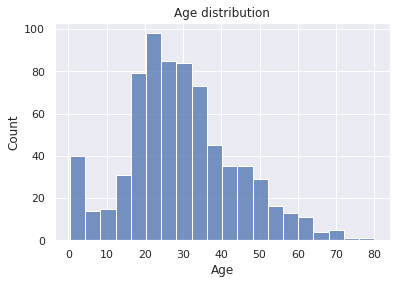

In [ ]:
#check the central tendencies for Age and Embarked
sns.histplot(train_df.Age)
plt.title('Age distribution')

from the plot age is almost normally distriuted tehrefore, i'll use the mean to reeplace the null values.

In [ ]:
# Dealing with the Missing Data
fill = {'Age':train_df.Age.mean(), 'Embarked': train_df.Embarked.mode()[0]}

train_df.fillna(fill, inplace=True)

In [ ]:
#now check for null values in our new dataset
train_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
#perfomr lable encode for the categorical columns
train_df['Sex'].replace(['male', 'female'],[0,1],inplace=True)
train_df['Embarked'].replace(['C', 'S','Q'],[0,1,2],inplace=True)

#5. Exploratory Analysis

##Univariate Analysis

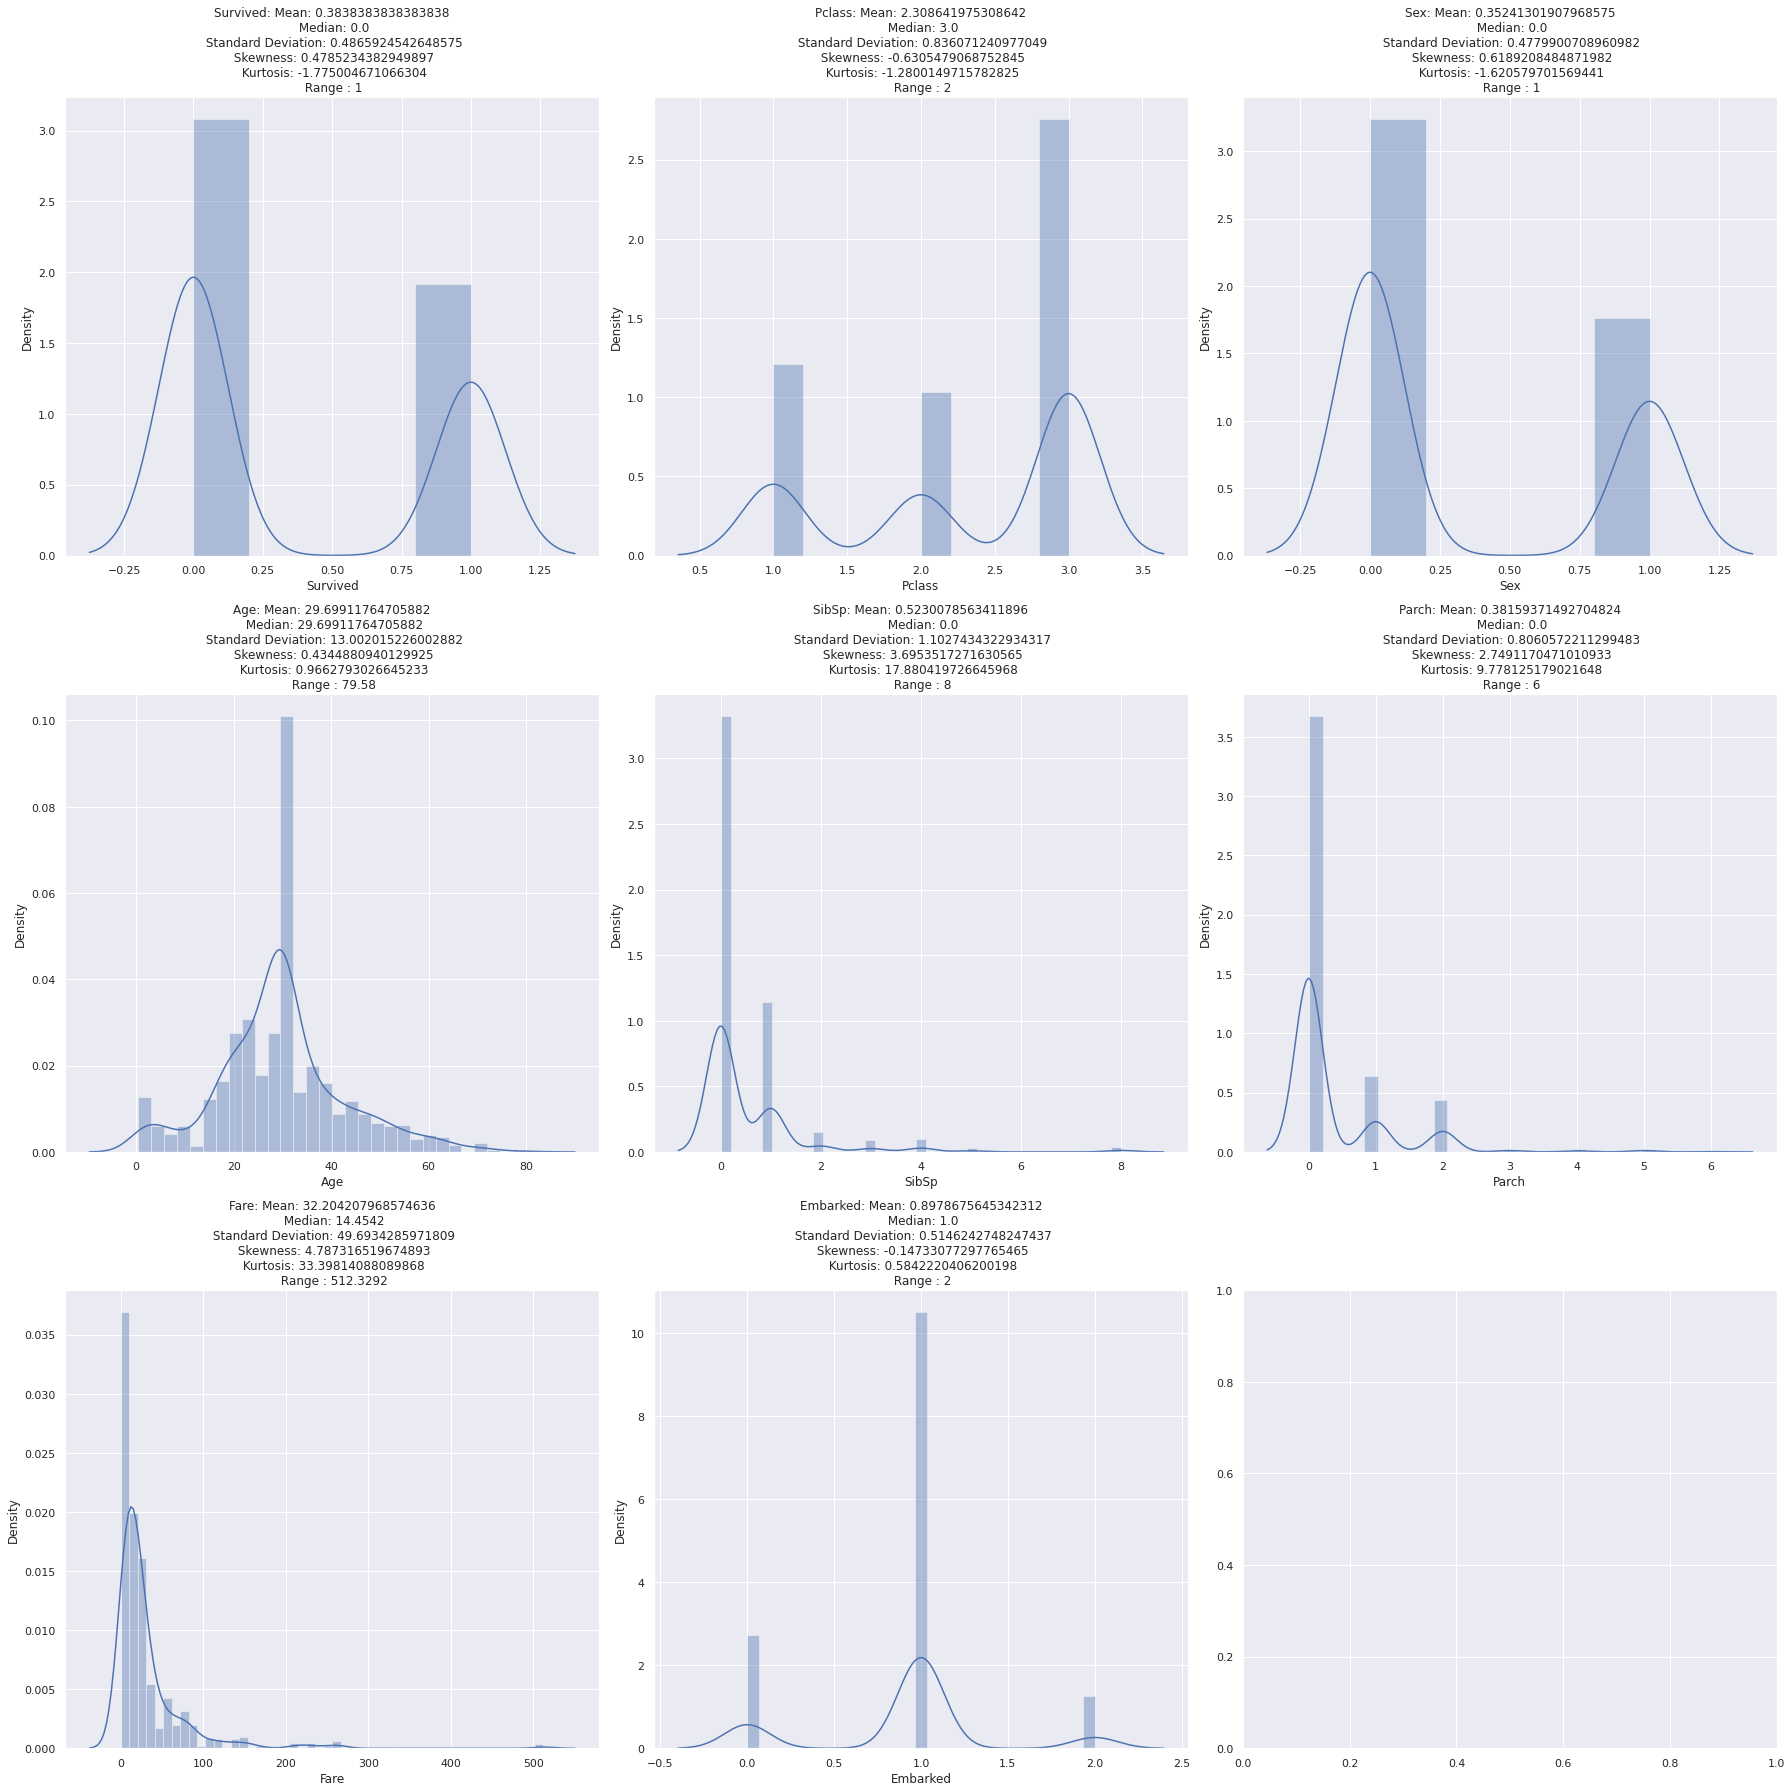

In [ ]:
#plotting summaries of the numerical columns from the dataset
num_var = train_df.select_dtypes(include=['int64','float64']).columns

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(25, 25))

for col, ax in zip(num_var, axes.flatten()):

  mean = train_df[col].mean()
  median = train_df[col].median()
  standard_var = train_df[col].std()
  skew = train_df[col].skew()
  kurt = train_df[col].kurt()
  range = train_df[col].max() - train_df[col].min()

  sns.distplot(train_df[col], hist=True, ax=ax)
  ax.set_title(f'{col}: Mean: {mean}\n Median: {median}\n Standard Deviation: {standard_var}\n Skewness: {skew}\n Kurtosis: {kurt}\n Range : {range}')

plt.tight_layout()

1. Survived: more people died from the ship wreck as seen from the plot.
2. Pclass: Most of the passengers who were in the 3rd class died from the ship wrec.
3. Sex: most of the people aboard the titanoic were male.
4. Age: most of the people aboard the titanic were of between ages 30 to 40.
5. Sbs: many of the people aoard the ship had no siblings onboard with them.
6. Parch: people with less than two children abord were the majority on the ship.
7. FAre: Those who paid the cheap fare rates were the maorit as they again were the majority who occupied 3rd class.
8. Embarked: most people who embraked at/from Southampton aboard the titanic.

In [ ]:
#measures of central tendancis for numerical data
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


##Bivariate Analysis

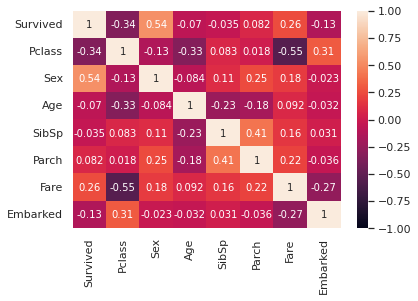

In [ ]:
# Determine correlation between features
sns.heatmap(train_df.corr(), vmin=-1, vmax=1, annot=True)
plt.show()

There is a weak strong correlation between survived and Sex. this beacuse most femals survived the ship wrec.



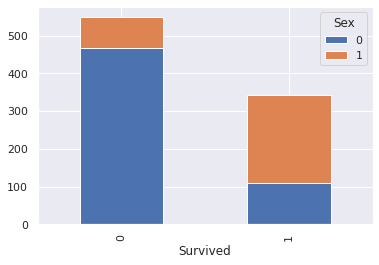

In [ ]:
#Further analysis in ralation to survival

#Survival based on gender
pd.crosstab(train_df.Survived, train_df['Sex']).plot(kind='bar', stacked=True)

From the plots we can tell that most males died in the wreck and most females survived.

Text(0.5, 1.0, 'People that did not Survive')

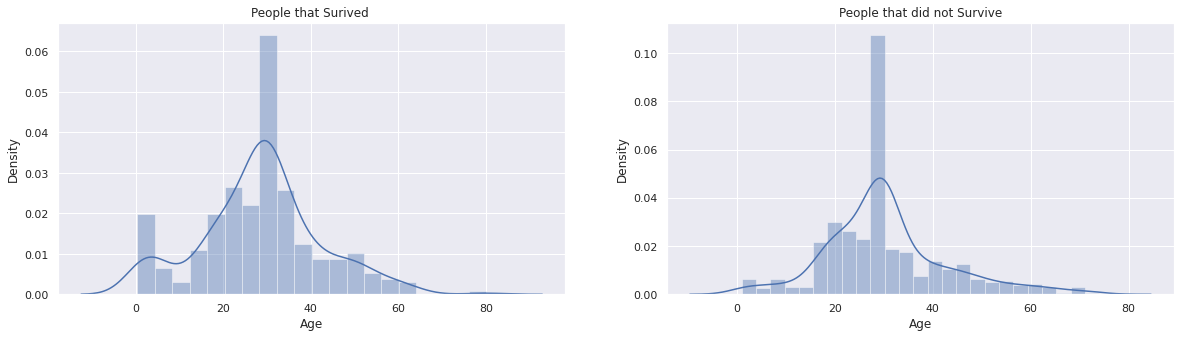

In [ ]:
#checking survival based on Age
f,ax=plt.subplots(1,2,figsize=(20,5))
sns.distplot(train_df[train_df['Survived']==1].Age,ax=ax[0])
ax[0].set_title('People that Surived ')


sns.distplot(train_df[train_df['Survived']==0].Age,ax=ax[1])
ax[1].set_title('People that did not Survive')

most people below age 25 survived in contrast to those above 25 years old.

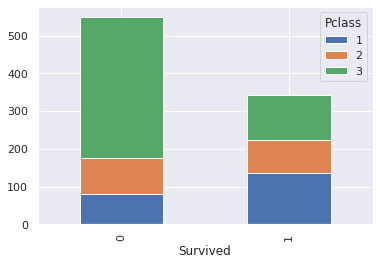

In [ ]:
# Relationship between passengers survival and passenger class
pd.crosstab(train_df.Survived, train_df['Pclass']).plot(kind='bar', stacked=True)

Most of the passengers in 3r class did not survive

In [ ]:
# Relationship between passengers survival and place they embarked
pd.crosstab(train.Survived, train.Embarked)

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


most of the passengers who embarked at Southampton did not survive.

In [ ]:
#check for the distribution of survival from our dataset
train_df.Survived.value_counts(normalize=True)*100

0    61.616162
1    38.383838
Name: Survived, dtype: float64

our classes are imbalanced. most poeple on the titanic(61.62%) did not survive compared to 38.38% who survived.

#6. Data Modelling 


K-Nearest Neighbours (KNN)

In [ ]:
# Split data into train and test sets
X = train_df.drop(['Survived'],axis=1)
Y = train_df['Survived']

# Stratify Y variable
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.3, random_state=23, stratify = Y)

In [ ]:
# Perform linear discriminant analysis on data
lda = LinearDiscriminantAnalysis(n_components=1)

lda.fit(x_train, y_train)

lda.explained_variance_ratio_

array([1.])

In [ ]:
# The first discriminant explains 100% variance in our data. Attempt to classify survival rate with lda
lda_pred = lda.predict(x_test)
print(classification_report(y_test, lda_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       165
           1       0.77      0.66      0.71       103

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.79      0.79      0.79       268



The LDA classifier has accuracy score of 79%. At the same time, the precision and Recall scores or those who survived (77% and 66%) are lower than the overal LDA classifier.

In [ ]:
# Deu to te imbalnce i got the roc_auc_scores
print(roc_auc_score(y_test, lda.predict_proba(x_test)[:, 1]))

0.8235069137981759


theh LDA classifoer has a higher roc_auc score. 82% for my survival class.

In [ ]:
# Transform train and test features
x_train_lda = lda.transform(x_train)
x_test_lda = lda.transform(x_test)

In [ ]:
# Scale x_train and x_test using Standard Scaler
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
# Create parameter grid and set up grid search
parameters = {
    'n_neighbors': np.arange(5, 11),
    'p':[1,2],
    'weights': ['uniform', 'distance'],
    'leaf_size': np.arange(20, 60, 10),
    'metric': ['euclidean','manhattan'],
    'algorithm': ['kd_tree','ball_tree','brute']
}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid=parameters, scoring='roc_auc', cv=10)

In [ ]:
# Fit using scaled features and lda features
scaled_features = grid_knn.fit(x_train, y_train)
lda_features = grid_knn.fit(x_train_lda,y_train)

print(f'Scaled X: {scaled_features.best_score_}\nLDA Transformed X: {lda_features.best_score_}')

Scaled X: 0.8369601278139607
LDA Transformed X: 0.8369601278139607


I have the same accurac from the LDA transormed features and Scaled features of 83.696%

In [ ]:
#KNN with LDA features
KNN_lda =  KNeighborsClassifier(n_neighbors=9, algorithm='kd_tree',leaf_size=20, metric='euclidean',p=1).fit(x_train_lda, y_train)
print(classification_report(y_test,KNN_lda.predict(x_test_lda)))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       165
           1       0.80      0.63      0.71       103

    accuracy                           0.80       268
   macro avg       0.80      0.77      0.78       268
weighted avg       0.80      0.80      0.79       268



In [ ]:
# Get confusion matrix
matrix = confusion_matrix(y_test, KNN_lda.predict(x_test_lda))
pd.DataFrame(matrix, columns=[0,1], index=[0,1])

,0,1
0,149,16
1,38,65


In [ ]:
# Get the roc_auc_scores because of the imbalance in our classes
print(roc_auc_score(y_test, KNN_lda.predict_proba(x_test_lda)[:, 1]))

0.8072962636069433


The KNN model fitted with LDA transformed data has an accuracy of 80% and it has higher false negatives than false positives.

In [ ]:
#scaled KNN model perfomance
KNN_scaled =  KNeighborsClassifier(n_neighbors=9, algorithm='kd_tree',leaf_size=20, metric='euclidean',p=1).fit(x_train, y_train)
print(classification_report(y_test,KNN_scaled.predict(x_test)))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       165
           1       0.79      0.66      0.72       103

    accuracy                           0.80       268
   macro avg       0.80      0.78      0.78       268
weighted avg       0.80      0.80      0.80       268



In [ ]:
# Get confusion matrix
matrix = confusion_matrix(y_test, KNN_scaled.predict(x_test))
pd.DataFrame(matrix, columns=[0,1], index=[0,1])

,0,1
0,147,18
1,35,68


In [ ]:
# Get the roc_auc_scores due to the imbalance in our classes
print(roc_auc_score(y_test, KNN_scaled.predict_proba(x_test)[:, 1]))

0.8374227714033537


In the KNN model fitted with scaled data, it has an accuracy of 80% also with higher false negatives than false positives.

In [ ]:
#to correct imbalance in our classes, i'll apply Synthetic Minority Oversamplin Technic(SMOTE)
#my test size is 40% when handling class imbalance in this step.

#set the dependent and indepent variables
X = train_df.drop(['Survived'],axis=1)
Y = train_df['Survived']

In [ ]:
#Apply SMOTE and split the train and test sizes
sm = SMOTE(sampling_strategy='auto', k_neighbors=1, random_state=42)
X_res, y_res = sm.fit_resample(X, Y)

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, test_size=.4, random_state=23)

In [ ]:
# Scale x train and x test with a standard scaler
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)



In [ ]:
#getting Knn SCaled
knn_scaled =  KNeighborsClassifier(n_neighbors=9, algorithm='kd_tree',leaf_size=20, metric='euclidean',p=1).fit(x_train, y_train)
print(classification_report(y_test,knn_scaled.predict(x_test)))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79       232
           1       0.76      0.80      0.78       208

    accuracy                           0.78       440
   macro avg       0.78      0.79      0.78       440
weighted avg       0.79      0.78      0.78       440



In [ ]:
# Get the roc_auc_scores due to the imbalance in our classes
print(roc_auc_score(y_test, knn_scaled.predict_proba(x_test)[:, 1]))

0.8488167274535809


Ater handling imbalance in my data, there is no improvemnt on the overal accuracy instead it has slightly dropped. however, there is an imporvemnt in the roc_auc accuracy to 84.88%

#Conlusion

The best perfoming model is the KNN Model with scaled features which has an accuracy of 80%. when delaing with imbalance by applying SMOTE, theh model perfomance drops to 78%, and at the same time, the roc_auc accurac improves to 84.88% 